In [2]:
# Import relevant libraries
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Set up plotting font size and a date locator for the plotting
plt.rcParams.update({'font.size': 20})
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

In [4]:
# Read in file of cases in England (originally parsed from government website)
cases = pd.read_csv('cases_england.csv')
cases['Date'] = pd.to_datetime(cases['Date'], format='%d-%b-%Y')

# Read in file of deaths in the UK (originally parsed from government website)
deaths = pd.read_csv('deaths.csv')
deaths['Date'] = pd.to_datetime(deaths['Date'], format='%d-%b-%Y')

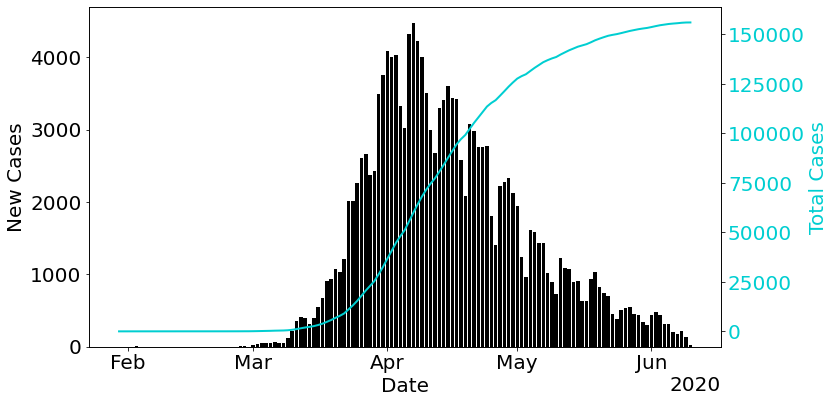

In [5]:
# Plot cases (bar plot for new daily cases and line for coumulative cases)
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for new daily cases
color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('New Cases', color=color)
ax1.bar(cases['Date'], cases['New_cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Get a new y-axis.
ax2 = ax1.twinx()

# Line plot for cumulative cases
color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Total Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(cases['Date'], cases['Total_cases'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

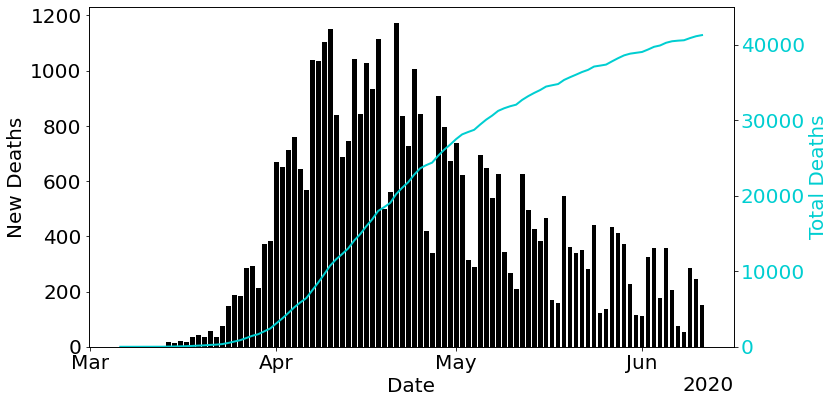

In [6]:
# Plot deaths (bar plot for new daily cases and line for coumulative cases)
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for new daily cases
color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('New Deaths', color=color)
ax1.bar(deaths['Date'], deaths['New_deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Get a new y-axis.
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Line plot for cumulative cases
color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(deaths['Date'], deaths['Total_deaths'], color=color, linewidth=2)
ax2.set_ylim(0,45000)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# Import the wrapper.
from coronadata import CoronaData

# Load cases and deaths files.
corona_data = CoronaData(cases_file='cases_england.csv', deaths_file='deaths.csv')

# Some methods to get the Pandas dataframes.
#corona_data.get_cases()
#corona_data.get_deaths()

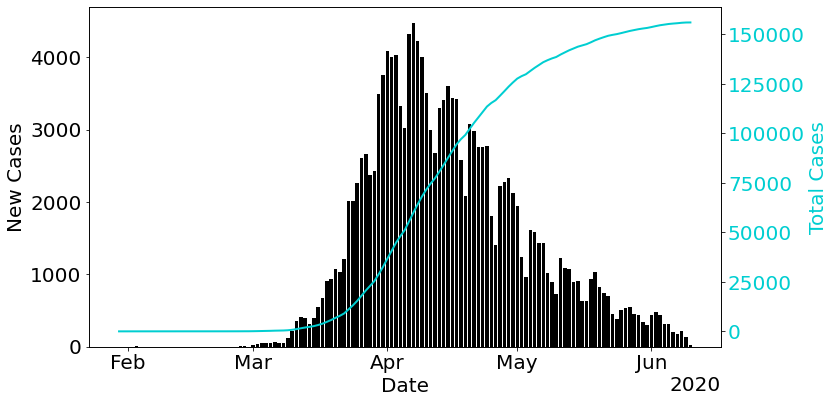

In [9]:
# Plot the cases using the wrapper.
corona_data.plot_cases(figsize=(12,6), colors=['k', 'darkturquoise'])

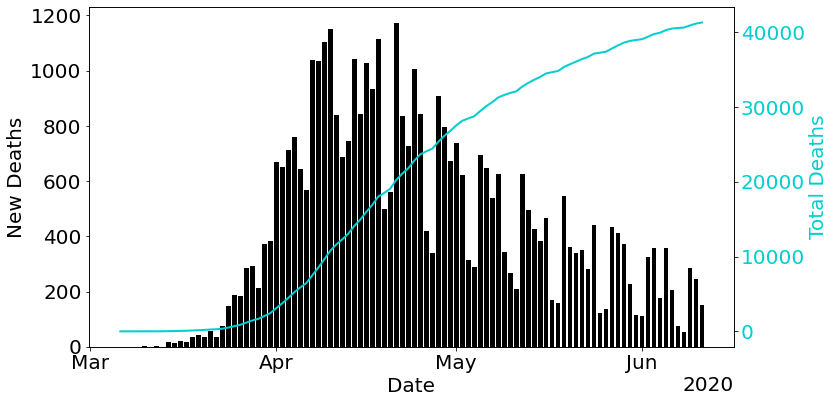

In [10]:
# Plot the deaths using the wrapper.
corona_data.plot_deaths(figsize=(12,6), colors=['k', 'darkturquoise'])